In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [3]:
plt.rcParams['font.family'] = 'sans-serif'  # Change to your desired font
plt.rcParams['font.size'] = 11              # Change to your desired fontsize
plt.rcParams['figure.dpi'] = 100            # Change to your desired image resolution

In [4]:
# reading dataset 

df = pd.read_excel("train_dataset.xlsx ", sheet_name = 'train_set') # copy and paste source data path
df.head()


,Disturbance Y/M/D (UT),CME start_time,Vp,Vlat,Vfrt,Vsw,aw,2aw,Tobs
0,2000/02/20 2139,2000/02/17 2006,566.508044,452,82.5,460,45.5,92.0,73.55
1,2000/04/06 1639,2000/04/04 1632,865.890828,379,123.0,620,61.5,124.0,48.12
2,2000/04/18 2000,2000/04/15 1035,511.749775,409,100.5,470,46.5,94.0,81.42
3,2000/05/02 1045,2000/04/29 0430,532.481363,337,130.0,860,85.5,172.0,78.25
4,2000/05/13 1700,2000/05/10 2006,604.741171,237,98.0,600,59.5,120.0,68.90


In [6]:
# observing correlation between variables

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

            Vp      Vlat      Vfrt       Vsw        aw       2aw      Tobs
Vp    1.000000  0.824245  0.840371  0.763784  0.706518  0.706518 -0.889204
Vlat  0.824245  1.000000  0.911854  0.743382  0.675118  0.675118 -0.648938
Vfrt  0.840371  0.911854  1.000000  0.755241  0.690083  0.690083 -0.655805
Vsw   0.763784  0.743382  0.755241  1.000000  0.953579  0.953579 -0.759053
aw    0.706518  0.675118  0.690083  0.953579  1.000000  1.000000 -0.713689
2aw   0.706518  0.675118  0.690083  0.953579  1.000000  1.000000 -0.713689
Tobs -0.889204 -0.648938 -0.655805 -0.759053 -0.713689 -0.713689  1.000000


In [ ]:
## fit a OLS model with intercept on Vp and Vlat

X, y = df[['Vlat']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
## fit a OLS model with intercept on Vp and Vfrt 

X, y = df[['Vfrt']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
# fit a OLS model with intercept on Vp and angular width

X, y = df[['2aw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
## fit a OLS model with intercept on Vp and Vsw

X, y = df[['Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
# multiple regression analysis for lateral_exp, front_exp and propagation speed

X, y = df[['Vlat', 'Vfrt']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

In [ ]:
# multiple regression analysis for front_exp, angular width, and propagation speed

X, y = df[['Vfrt', '2aw']], df['Vp']

## fit a OLS model with intercept on Vlat and Vfrt 
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()





In [ ]:
# multiple regression analysis for front_exp, solar_wind and propagation speed

X, y = df[['Vfrt', 'Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()


In [ ]:
# multiple regression analysis for  front, lateral, angular width and propagation speed

X, y = df[['Vfrt', 'Vlat', '2aw' ]], df['Vt']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

In [ ]:
# multiple regression analysis for front, lateral, solar wind and propagation speed

X, y = df[['Vfrt', 'Vlat', 'Vsw']], df['Vp']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

In [ ]:
# multiple regression analysis for front, lateral, angular width, solar wind and propagation speed

X, y = df[['Vfrt', 'Vlat',  '2aw', 'Vsw']], df['Vt']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit() 
model.summary()

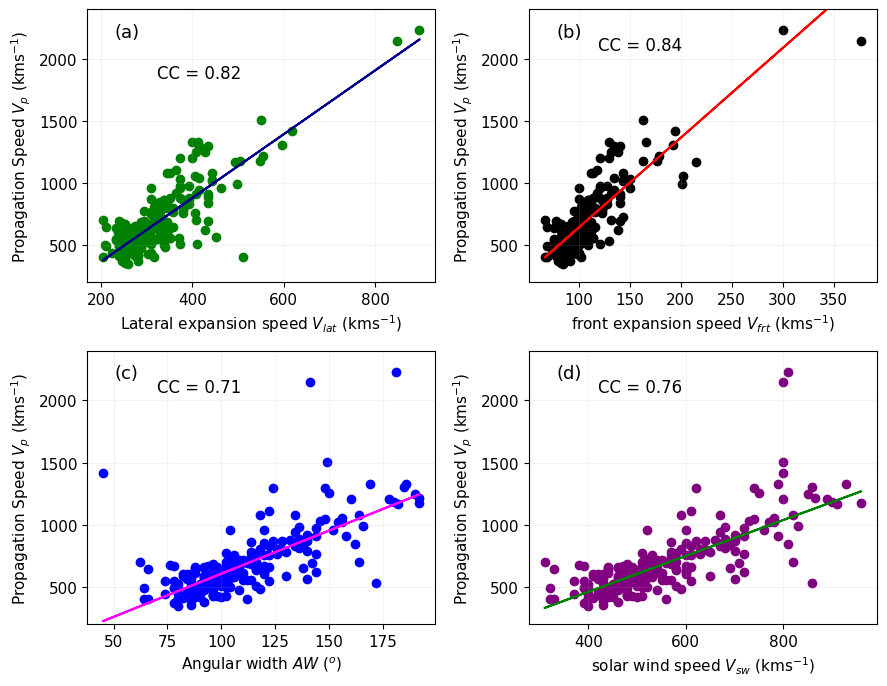

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate some sample data
X, y = df[['Vlat']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.figure(figsize = (9, 7))

plt.subplot(2,2,1)
plt.scatter(X, y, c='green')
plt.plot(X, y_pred, c='darkblue')
plt.xlabel('Lateral expansion speed $V_{lat}$ (kms$^{-1}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.82', xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(a)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')



X, y = df[['Vfrt']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(2,2,2)
plt.scatter(X, y, c='black')
plt.plot(X, y_pred, c='red')
plt.xlabel('front expansion speed $V_{frt}$ (kms$^{-1}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.84', xy=(0.2, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(b)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['2aw']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(2,2,3)
plt.scatter(X, y, c='blue')
plt.plot(X, y_pred, c='magenta')
plt.xlabel('Angular width $AW$ ($^{o}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.71', xy=(0.2, 0.9), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(c)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')




X, y = df[['Vsw']], df['Vp']
# Fit the Huber regression model
model = make_pipeline(StandardScaler(), HuberRegressor())
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)


plt.subplot(2,2,4)
plt.scatter(X, y, c='purple')
plt.plot(X, y_pred, c='green')
plt.xlabel('solar wind speed $V_{sw}$ (kms$^{-1}$)')
plt.ylabel('Propagation Speed $V_{p}$ (kms$^{-1}$)')
plt.ylim(200, 2400)
# plt.legend(frameon=0)
plt.grid(True, alpha =0.15)
plt.annotate(f'CC = 0.76', xy=(0.2, 0.90), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.annotate(f'(d)', xy=(0.08, 0.95), xycoords='axes fraction', fontsize=13, ha='left', va='top')

plt.tight_layout()
plt.show()
